# Applying DMD for transient modeling, surrogates and Uncertainty Quantificaton.

## 2D LRA Benchmark: 

In this test case, a control rod ejection in the 2D well known LRA benchmark has been simulated by Detran (developed by J. A. Roberts). The objective here is to build a data-driven, yet physics-revealing time-dependent surrogate model(s). The linearity inherited from the connection to Koopman theory will facilitate a forward/backward uncertainty propagation. 

First of all, lets make the necessary imports including the DMD class from PyDMD (developed by math)we import the DMD class from the pydmd package, we set matplotlib for the notebook and we import numpy.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import scipy as sp
from pydmd import DMD_jov,MrDMD,FbDMD,HODMD
import pickle

In [29]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times'

#plt.rcParams['mathtext.fontset'] = 'custom'
#plt.rcParams['mathtext.rm'] = 'Times New Roman'
#plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
#plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 18
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.frameon'] = False

plt.rcParams['figure.titlesize'] = 16

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

plt.rcParams['text.usetex'] = True

plt.rcParams['savefig.bbox'] = 'tight'

We load the Detran simulation data of the Transient LRA Benchmark

In [3]:
A = pickle.load(open('../inputs/diffusion2x2_ref_with_mesh_temps.p','rb'),encoding='latin')

In [4]:
#%% Plots of raw data
t = np.array(A['times'])   # time
mp = np.array(A['meshpower']).T # mesh-dependent powers
p = np.array(A['power'])# total power
c = p[0]/sp.sum(mp,axis=0)[0]# use to reconstruct power from mesh power
maxtemp = A['maxtemp']#
np.where(p==max(p))

(array([143]),)

217.44 32.0 6.0


Text(0,0.5,'Total Power')

/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0
217.44 32.0 6.0


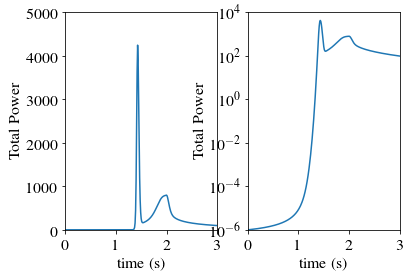

In [5]:
fig1=plt.figure()
ax1 = fig1.add_subplot(121)
ax1.plot(t, p)
plt.xlabel('time (s)')
plt.ylabel('Total Power')
ax2 = fig1.add_subplot(122)
ax2.semilogy(t, p)
plt.xlabel('time (s)')
plt.ylabel('Total Power')

In [6]:
# Single surrogate
dmd = DMD_jov(svd_rank=50,opt='Jov',exact=True)
dmd.fit(mp)
surrogate={}
surrogate['dmd'] = dmd
surrogate['t'] = t # All the coming lines can be ommitted except p_dmd
surrogate['Phi'] = dmd.modes
surrogate['eigs'] = dmd.eigs
surrogate['mp_dmd'] = dmd.reconstructed_data
surrogate['p_dmd'] = sp.zeros(len(t))
surrogate['p_dmd'] = c*sp.sum(dmd.reconstructed_data.real,axis=0)
surrogate['Phi'].shape

/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/pydmd-0.1.0-py3.6.egg/pydmd/dmd_jov.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  Vand[:, k] = eigs**(k)


(484, 50)

217.44 32.0 6.0
217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0


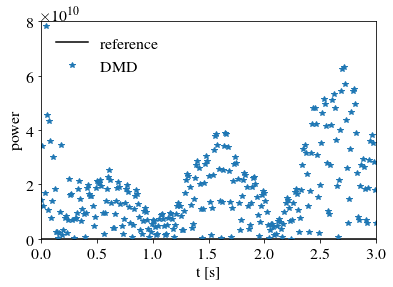

In [7]:
fig0=plt.figure()
plt.plot(t, p, 'k-', label='reference')
plt.plot(surrogate['t'], (abs(surrogate['p_dmd'].real)), '*', label='DMD')
plt.xlabel('t [s]')
plt.ylabel('power')
plt.legend()


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0
217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


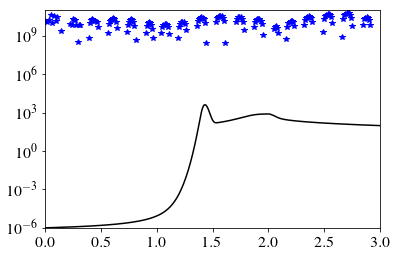

In [8]:
fig2=plt.figure()
plt.semilogy(t, p, 'k-', label='reference')
plt.semilogy(t, c*sp.sum(surrogate['mp_dmd'],axis=0).real, '*b', label='DMD Surrogate')

In [9]:
# Single surrogate
# fbdmd = FbDMD(svd_rank=100)
# fbdmd.fit(mp.T)
# surrogatefb={}
# surrogatefb['dmd'] = fbdmd
# surrogatefb['t'] = t # All the coming lines can be ommitted except p_dmd
# surrogatefb['Phi'] = fbdmd.modes
# surrogatefb['eigs'] = fbdmd.eigs
# surrogatefb['mp_dmd'] = fbdmd.reconstructed_data
# surrogatefb['p_dmd'] = sp.zeros(len(t))
# surrogatefb['p_dmd'] = c*sp.sum((fbdmd.reconstructed_data.real),axis=0)

In [10]:
# fig0=plt.figure()
# plt.plot(t, p, 'k-', label='reference')
# plt.plot(t, (surrogatefb['p_dmd'].real), '*', label='FbDMD')
# plt.xlabel('t [s]')
# plt.axis([0, 3, 0, 5000])
# plt.ylabel('power')
# plt.legend()


In [11]:
# # Single surrogate
# mrdmd = MrDMD(svd_rank=-1, max_level=3, max_cycles=2)
# mrdmd.fit([mp])
# surrogatemr={}
# surrogatemr['dmd'] = mrdmd
# surrogatemr['t'] = t # All the coming lines can be ommitted except p_dmd
# surrogatemr['Phi'] = mrdmd.modes
# surrogatemr['eigs'] = mrdmd.eigs
# surrogatemr['mp_dmd'] = mrdmd.reconstructed_data
# surrogatemr['p_dmd'] = sp.zeros(len(t))
# surrogatemr['p_dmd'] = c*sp.sum(mrdmd.reconstructed_data.real,axis=0)

Build the surrogates using a batch of DMD's

In [12]:
#%%  DMD analysis

# Time step
dt = t[1]-t[0]
# Chop the time domain into discrete patches
#time_interval = [1.16,1.37,1.5,max(t)]
time_interval = [1.36,1.5,max(t)]
#time_interval = [1.37,1.5,max(t)]


# Define desire subspace size for each patch
r = [10,13,35]
#r = [50,1e5,15]
#step=[10,1,1]
optimal=['Jov',False,False]
# Perform dmd
time_index = [0]
for i in range(len(time_interval)):
    time_index.append(sp.sum(t<=time_interval[i]))

results={}
for i in range(len(time_interval)):
    start, stop = time_index[i], time_index[i+1]
    t_i = t[start:stop]
    #t_i = t[start:stop:step[i]]
    
    #t = np.linspace(t[start], t[stop], len(t_i))
    #x = np.linspace(0, 484, 484)
    #xgrid, tgrid = np.meshgrid(x, t)

    
    dmd = DMD_jov(svd_rank=r[i],opt=optimal[i])
    dmd.fit(mp[:,start:stop])
#    counter=0
#    for eig in dmd.eigs:
#        if np.abs(eig.imag**2+eig.real**2)>4:
#            dmd.eigs[counter]=1.0
#        counter+=1
    results[i]={}
    results[i]['dmd'] = dmd
    results[i]['t'] = t_i # All the coming lines can be ommitted except p_dmd
    results[i]['Phi'] = dmd.modes
    results[i]['eigs'] = dmd.eigs
    results[i]['mp_dmd'] = dmd.reconstructed_data
    results[i]['p_dmd'] = sp.zeros(stop-start)
    results[i]['p_dmd'] = c*sp.sum(dmd.reconstructed_data.real,axis=0)

/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/pydmd-0.1.0-py3.6.egg/pydmd/dmd_jov.py:69: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b = np.linalg.lstsq(modes, snapshots.T[0])[0]


One can inspect the temporal behaviour of the system from the data. specifically, from the eigenvalues. The location of the eigen value on the argand plane dectates, stability, convergence or divergence. If the eigen value is located on the unit circle, it is stable, if it is inside it will converge, and if it is outside, it will diverge. 

Eigenvalue 9.560763337381788: distance from unit circle 90.40819559342374
Eigenvalue 5.573550591704111: distance from unit circle 30.064466198285242
Eigenvalue 3.2567817127227627: distance from unit circle 9.606627124325412
Eigenvalue 2.364154542937743: distance from unit circle 4.589226702893168
Eigenvalue 1.8000081181188665: distance from unit circle 2.2400292252938234
Eigenvalue 1.402847282055576: distance from unit circle 0.9679804967707166
Eigenvalue 1.1302618229937151: distance from unit circle 0.27749178851707623
Eigenvalue 0.9964884019635838: distance from unit circle 0.0070108647520630285
Eigenvalue 0.9998170811989787: distance from unit circle 0.00036580414275477757
Eigenvalue 1.0145649215169665: distance from unit circle 0.02934197997272836
434.88 32.0 13.0
434.88 32.0 13.0


<Figure size 432x288 with 0 Axes>

/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0


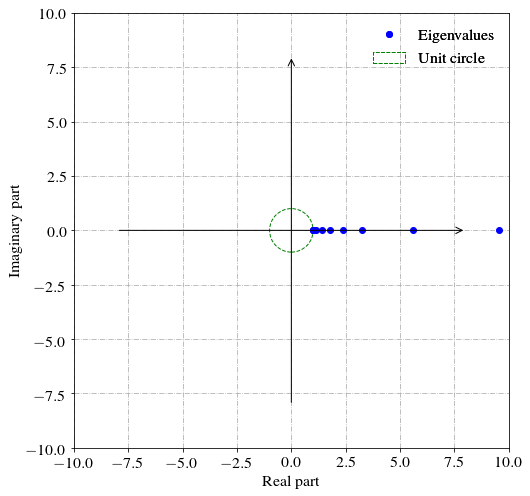

434.88 32.0 13.0
434.88 32.0 13.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0


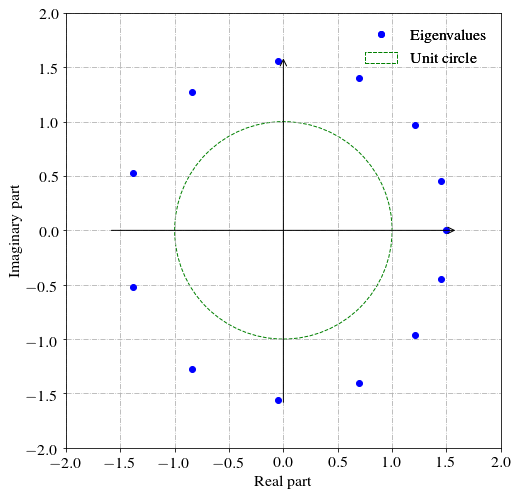

434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0
434.88 32.0 13.0


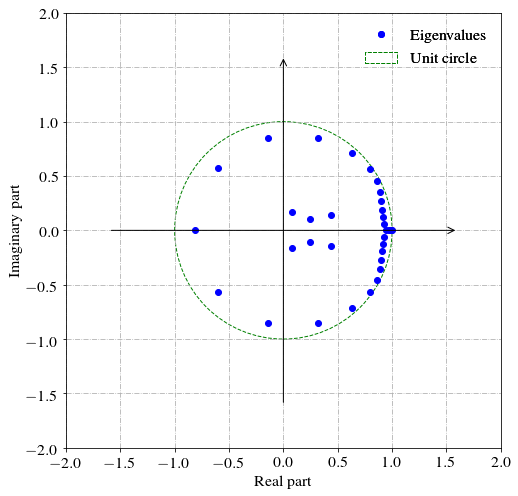

In [13]:
#print("dmd for times {:.2e}--{:.2e}".format(results[0]['t'][0], results[0]['t'][-1])) 
fig2=plt.figure()
#ax1=fig2.add_subplot(1,3,1)
for eig in results[0]['eigs']:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))
for j in range(len(time_interval)): 
    results[j]['dmd'].plot_eigs(show_axes=True, show_unit_circle=True)

#ax2=fig2.add_subplot(1,3,2)
#print("dmd for times {:.2e}--{:.2e}".format(results[1]['t'][0], results[1]['t'][-1])) 
#for eig in results[1]['eigs']:
#    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))
#results[1]['dmd'].plot_eigs(show_axes=True, show_unit_circle=True)

#ax3=fig2.add_subplot(1,3,3)
#print("dmd for times {:.2e}--{:.2e}".format(results[2]['t'][0], results[2]['t'][-1])) 
#for eig in results[2]['eigs']:
#    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))
#results[2]['dmd'].plot_eigs(show_axes=True, show_unit_circle=True)

### Spatial Stability Analysis:

In [14]:
#E=np.linalg.eigvals(mp.T)
##for e in E:
#plt.plot(e.real,e.imag,'*')

217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 3

/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0


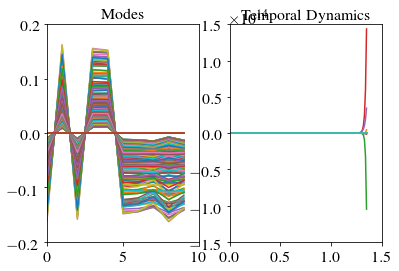

In [15]:
fig2=plt.figure()
ax1 = fig2.add_subplot(121)
for mode in results[0]['Phi']:
    ax1.plot( mode.real)
    plt.title('Modes')
ax2 = fig2.add_subplot(122)
for dynamic in results[0]['dmd'].dynamics:
    ax2.plot(results[0]['t'], dynamic.real)
    plt.title('Temporal Dynamics')
plt.show()

217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 3

/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0
217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0


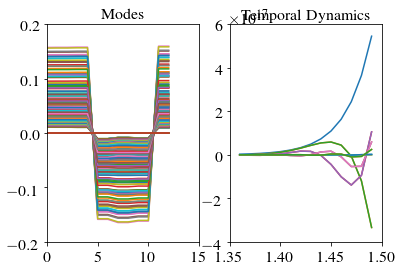

In [16]:
fig3=plt.figure()
ax1 = fig3.add_subplot(121)
for mode in results[1]['Phi']:
    plt.plot( mode.real)
    plt.title('Modes')
ax2 = fig3.add_subplot(122)
for dynamic in results[1]['dmd'].dynamics:
    plt.plot(results[1]['t'], dynamic.real)
    plt.title('Temporal Dynamics')
plt.show()

217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 3

/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0


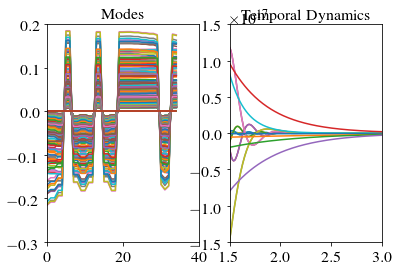

In [17]:
fig4=plt.figure()
ax1 = fig4.add_subplot(121)
for mode in results[2]['Phi']:
    plt.plot( mode.real)
    plt.title('Modes')
ax2 = fig4.add_subplot(122)
for dynamic in results[2]['dmd'].dynamics:
    plt.plot(results[2]['t'], dynamic.real)
    plt.title('Temporal Dynamics')
plt.show()

In [18]:
# fig4=plt.figure()
# ax1 = fig4.add_subplot(121)
# for mode in results[3]['Phi']:
#     plt.plot( mode.real)
#     plt.title('Modes')
# ax2 = fig4.add_subplot(122)
# for dynamic in results[3]['dmd'].dynamics:
#     plt.plot(results[3]['t'], dynamic.real)
#     plt.title('Temporal Dynamics')
# plt.show()

271.8 32.0 8.0
271.8 32.0 8.0
271.8 32.0 8.0
271.8 32.0 8.0
271.8 32.0 8.0
271.8 32.0 8.0
271.8 32.0 8.0
271.8 32.0 8.0
271.8 32.0 8.0
271.8 32.0 8.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


271.8 32.0 8.0
271.8 32.0 8.0
271.8 32.0 8.0
271.8 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0
275.44 32.0 8.0


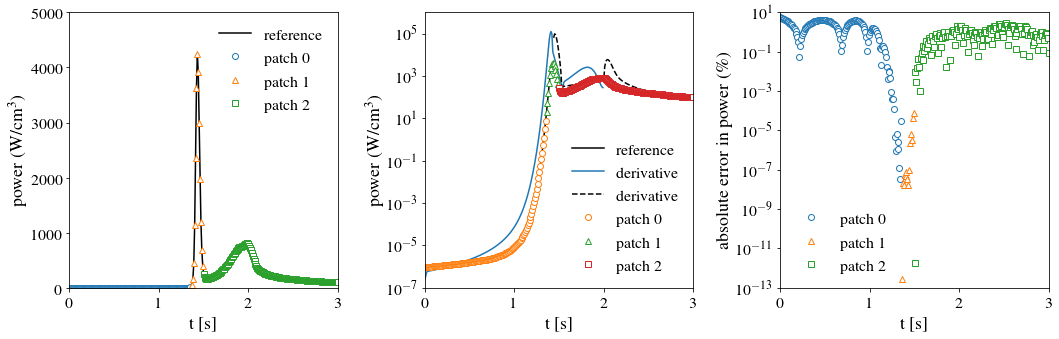

In [48]:
#for mode in dmd.modes.T:
#    plt.plot(x, mode.real)
#    plt.title('Modes')
#plt.show()T.real)
    
#plt.pcolor(xgrid, tgrid, ((mp[start:stop, :].T-dmd.reconstructed_data).T).real)
#fig = plt.colorbar()

markers = ['o', '^', 's']

fig5=plt.figure(figsize=(15,5))

# Plot the surrogate and reference on a linear plot
ax1=fig5.add_subplot(1,3,1)
plt.plot(t, p, 'k-', label='reference')
for k in range(len(time_interval)):
    plt.plot(results[k]['t'], results[k]['p_dmd'].real, marker=markers[k], ls='', mfc='w', label='patch '+str(k))    
plt.axis([0, 3, 0, 5000])
plt.xlabel('t [s]')
plt.ylabel('power (W/cm$^3$)')
plt.legend()

# Plot the surrogate and reference on a log plot.  Put the derivative on the other axis.
ax2=fig5.add_subplot(1,3,2)  
plt.semilogy(t, p, 'k-', label='reference')
dpdt = np.gradient(p, t)

idx_pos = dpdt>0
idx_neg = dpdt<0
plt.semilogy(t[idx_pos], dpdt[idx_pos], t[idx_neg], abs(dpdt[idx_neg]),  'k--', label='derivative')
for k in range(len(time_interval)):
    plt.semilogy(results[k]['t'], results[k]['p_dmd'].real, marker=markers[k], ls='', mfc='w', label='patch '+str(k))
plt.xlabel('t [s]')
plt.ylabel('power (W/cm$^3$)')
plt.legend()

# Plot the error
ax2=fig5.add_subplot(1,3,3)  
t_start = 0
for k in range(len(time_interval)):
    t_end = t_start + len(results[k]['t'])
    ref = p[t_start:t_end]
    err = abs(results[k]['p_dmd'].real-ref)/ref*100
    plt.semilogy(t[t_start:t_end], err, marker=markers[k], 
                 ls='', mfc='w', label='patch '+str(k))
    t_start = t_end
plt.xlabel('t [s]')
plt.ylabel('absolute error in power (\%)')
plt.legend()

plt.tight_layout()
plt.savefig('../images/corepower.pdf')

217.44 32.0 6.0


217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0
217.44 32.0 6.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


217.44 32.0 6.0


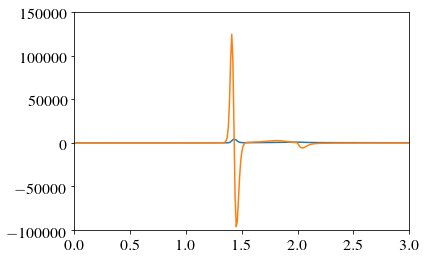

In [49]:
dpdt = np.gradient(p, t)

plt.plot(t, p, t, dpdt)

In [21]:
Xdmd_2D=np.reshape(np.concatenate((results[0]['mp_dmd'],results[1]['mp_dmd'],results[2]['mp_dmd']),axis=1),(22,22,-1),order='F')
mp_2D=np.reshape(mp,(22,22,-1),order='F')

In [22]:
X,Y=np.linspace(0,23,22),np.linspace(0,23,22)

In [23]:
xgrid,ygrid=np.meshgrid(X,Y)

In [24]:
Xdmd_2D[:,:,0].shape,mp_2D[:,:,0].shape
E = abs(mp_2D.real-Xdmd_2D.real)/mp_2D.real*100
E[mp_2D==0]=0

/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


t=0
326.16 32.0 10.0
326.16 32.0 10.0
326.16 32.0 10.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0


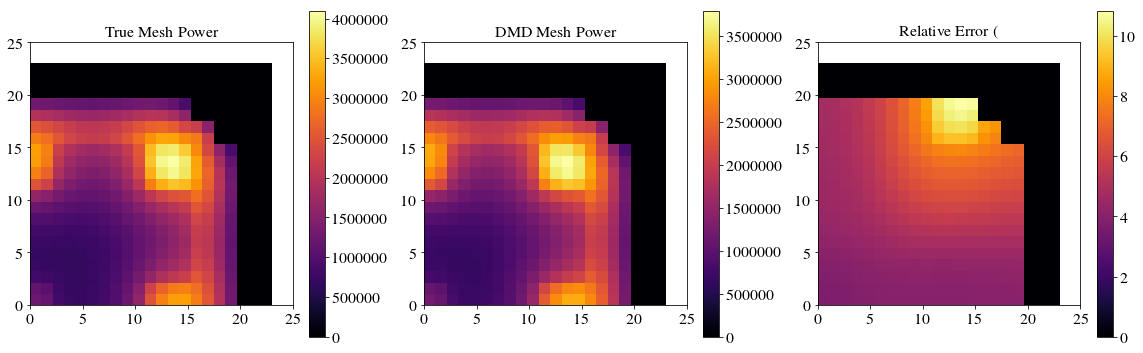

In [25]:
print('t=0')
fig = plt.figure(figsize=(20,6))
ax1=fig.add_subplot(1,3,2)
ax1.set_aspect('equal')
plt.pcolor(xgrid, ygrid, Xdmd_2D[:,:,0].real,cmap='inferno')
plt.colorbar()
plt.title('DMD Mesh Power')
ax2=fig.add_subplot(1,3,1)
ax2.set_aspect('equal')
plt.pcolor(xgrid, ygrid, mp_2D[:,:,0].real,cmap='inferno')
plt.colorbar()
plt.title('True Mesh Power')
ax3=fig.add_subplot(1,3,3)
ax3.set_aspect('equal')
plt.pcolor(xgrid, ygrid, E[:,:,0],cmap='inferno')
plt.colorbar()
plt.title('Relative Error (%)')
plt.savefig('../images/Initial_spatial_power_colorMap.pdf')

t=1.43
326.16 32.0 10.0
326.16 32.0 10.0
326.16 32.0 10.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0


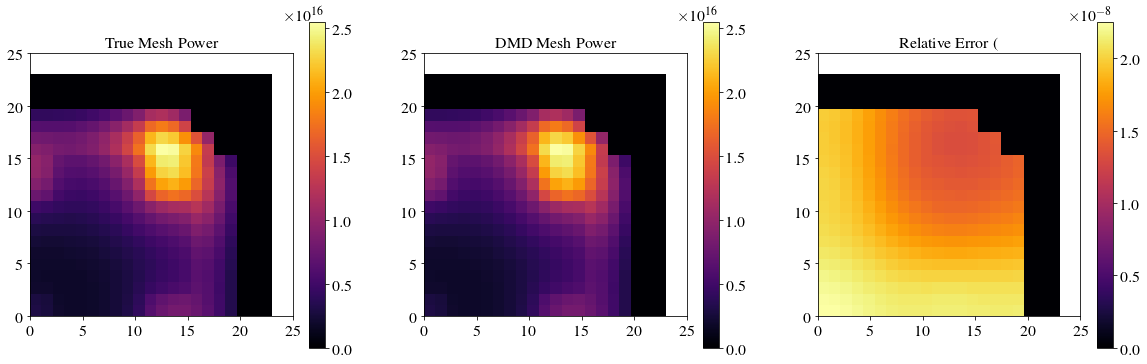

In [26]:
print('t=1.43')
t_pmax = 143
fig = plt.figure(figsize=(20,6))
ax1=fig.add_subplot(1,3,2)
ax1.set_aspect('equal')
plt.pcolor(xgrid, ygrid, Xdmd_2D[:,:,t_pmax].real,cmap='inferno')
plt.colorbar()
plt.title('DMD Mesh Power')
ax2=fig.add_subplot(1,3,1)
ax2.set_aspect('equal')
plt.pcolor(xgrid, ygrid, mp_2D[:,:,t_pmax].real,cmap='inferno')
plt.colorbar()
plt.title('True Mesh Power')
ax3=fig.add_subplot(1,3,3)
ax3.set_aspect('equal')
plt.pcolor(xgrid, ygrid,E[:,:,t_pmax],cmap='inferno')
plt.colorbar()
plt.title('Relative Error (%)')
plt.savefig('../images/MaxP_spatial_power_colorMap.pdf')

t=2.5
326.16 32.0 10.0
326.16 32.0 10.0
326.16 32.0 10.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


236.32941176470598 32.0 7.0
236.32941176470598 32.0 7.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

236.32941176470598 32.0 7.0
236.32941176470598 32.0 7.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
236.32941176470592 32.0 7.0
236.32941176470592 32.0 7.0
262.5882352941176 32.0 8.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0


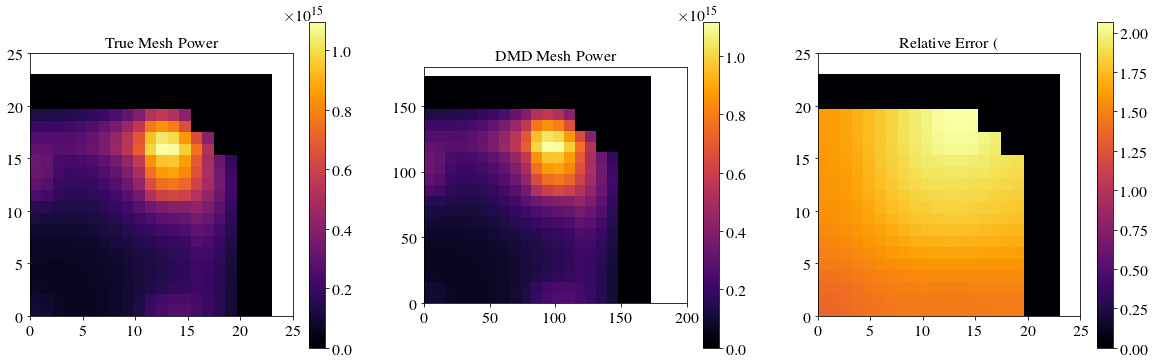

<Figure size 432x288 with 0 Axes>

In [27]:
print('t=2.5')
np.seterr(divide='ignore', invalid='ignore')
fig = plt.figure(figsize=(20,6))
ax1=fig.add_subplot(1,3,2)
ax1.set_aspect('equal')
plt.pcolor(7.5*xgrid, 7.5*ygrid, Xdmd_2D[:,:,250].real,cmap='inferno')
plt.colorbar()
plt.title('DMD Mesh Power')
ax2=fig.add_subplot(1,3,1)
ax2.set_aspect('equal')
plt.pcolor(xgrid, ygrid, mp_2D[:,:,250].real,cmap='inferno')
plt.colorbar()
plt.title('True Mesh Power')
ax3=fig.add_subplot(1,3,3)
ax3.set_aspect('equal')
plt.pcolor(xgrid, ygrid,E[:,:,250],cmap='inferno')
plt.colorbar()
plt.title('Relative Error (%)')
plt.show()
plt.savefig('../images/secondhump_spatial_power_colorMap.pdf')

t=3
326.16 32.0 10.0
326.16 32.0 10.0
326.16 32.0 10.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


236.32941176470598 32.0 7.0
236.32941176470598 32.0 7.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
236.32941176470598 32.0 7.0
236.32941176470598 32.0 7.0
262.5882352941177 32.0 8.0
262.5882352941177 32.0 8.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0


/home/robertsj/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


236.32941176470592 32.0 7.0
236.32941176470592 32.0 7.0
262.5882352941176 32.0 8.0
262.5882352941176 32.0 8.0


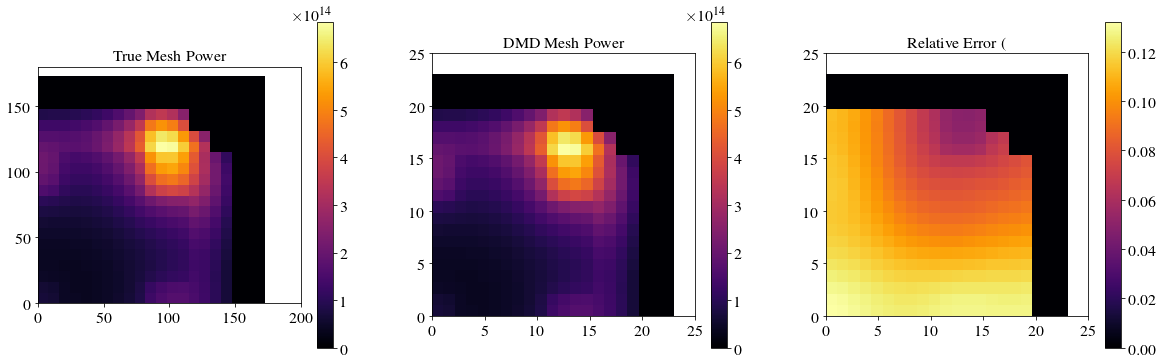

<Figure size 432x288 with 0 Axes>

In [28]:
print('t=3')
fig = plt.figure(figsize=(20,6))
ax1=fig.add_subplot(1,3,2)
ax1.set_aspect('equal')
plt.pcolor(xgrid, ygrid, Xdmd_2D[:,:,-1].real,cmap='inferno')
plt.colorbar()
plt.title('DMD Mesh Power')
ax2=fig.add_subplot(1,3,1)
ax2.set_aspect('equal')
plt.pcolor(7.5*xgrid, 7.5*ygrid, mp_2D[:,:,-1].real,cmap='inferno')
plt.colorbar()
plt.title('True Mesh Power')
ax3=fig.add_subplot(1,3,3)
ax3.set_aspect('equal')
plt.pcolor(xgrid, ygrid,E[:,:,300],cmap='inferno')
plt.colorbar()
plt.title('Relative Error (%)')
plt.show()
plt.savefig('../images/end_spatial_power_colorMap.pdf')